#### Q1. For this problem, we will be working with the automobile dataset from the UCI repository. Using this dataset:
## 1. Train a k-nearest neighbors regression model, and report its validation set performance using root mean squared error. (15 points)


In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

#importing the data and saving it in a pandas dataframe
na = ['?']
tmp = ["symboling","normalized-losses","make","fuel-type", "aspiration", "num-of-doors", "body-style", \
       "drive-wheels","engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", \
           "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower",  "peak-rpm", "city-mpg", "highway-mpg", \
               "price"]



df = pd.read_csv(r"/home/joker/Downloads/Video/SEM1-Downloads/CS771A/assignments/ass1_graded/imports-85.data", header = None, na_values = na,  names= tmp)


#data cleaning and replacing nan value with meadian and mode
df = df.replace('?', np.nan)

df.fillna(df.mean(), inplace=True)

mode = str(df['num-of-doors'].mode())
df['num-of-doors'].fillna("four", inplace=True)

df.isna().sum()


symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

> __One hot encoding__ for categorical data, __feature scaling__ for _Integer_ and _Float_ data, and sampling the data into __train, test and validation__ sets

In [348]:

a = list(df.columns.values)

dummy_cols = [col for col in df.columns if (df.dtypes[col] != np.float64 and df.dtypes[col] != np.int64)]
df = pd.get_dummies(df, columns = dummy_cols)


for d in dummy_cols:
    a.remove(d)

a.remove("price")
    
for col in a:
    maxx = df[col].max()
    minn = df[col].min()
    
    
    df[col] = df[col].apply(lambda x: (x-minn)/(maxx-minn))
    
tmp = df["price"]
df.drop("price", axis=1, inplace=True)
df['price'] = tmp
    
training_data_u = df.sample(frac=0.8, random_state=25)
testing_data_u = df.drop(training_data_u.index)

validation_data_u = training_data_u.sample(frac=0.25, random_state=25)
training_data_u = training_data_u.drop(validation_data_u.index)



In [334]:
validation_data_u

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,price
71,0.2,0.298429,0.845481,0.917910,0.950000,0.725000,0.873545,0.652830,0.657143,0.490476,...,0,0,0,0,0,0,1,0,0,34184.0
49,0.4,0.298429,0.448980,0.755224,0.858333,0.000000,0.955004,1.000000,0.714286,0.328571,...,0,0,0,0,0,0,1,0,0,36000.0
17,0.4,0.298429,0.682216,0.834328,0.883333,0.708333,0.782389,0.558491,0.771429,0.628571,...,0,0,0,0,0,0,1,0,0,36880.0
184,0.8,0.151832,0.311953,0.456716,0.433333,0.658333,0.301009,0.135849,0.335714,0.633333,...,0,0,0,0,1,0,0,0,0,7995.0
103,0.4,0.225131,0.402332,0.649254,0.516667,0.608333,0.609775,0.452830,0.635714,0.571429,...,0,0,0,0,0,0,1,0,0,13499.0
105,1.0,0.675393,0.137026,0.441791,0.633333,0.158333,0.640419,0.452830,0.635714,0.571429,...,0,0,0,0,0,0,1,0,0,19699.0
161,0.4,0.136126,0.265306,0.376119,0.341667,0.416667,0.245927,0.139623,0.464286,0.457143,...,0,0,1,0,0,0,0,0,0,8358.0
180,0.2,0.130890,0.521866,0.697015,0.516667,0.525000,0.637316,0.415094,0.521429,0.609524,...,0,0,0,0,0,0,1,0,0,15690.0
25,0.6,0.434555,0.206997,0.241791,0.291667,0.233333,0.194337,0.109434,0.307143,0.552381,...,0,0,1,0,0,0,0,0,0,6692.0
193,0.4,0.298429,0.402332,0.626866,0.550000,0.608333,0.416990,0.181132,0.464286,0.633333,...,0,0,0,0,0,0,1,0,0,12290.0


In [337]:
def getPrice(x,ind,k):

    out = []
    for i in range(len(training_data_u)):
        d = {}
        d['price'] = training_data_u.iloc[i, 75]
        d['distance'] = np.linalg.norm(np.array(x.iloc[ind, 0:75])-np.array(training_data_u.iloc[i,0:75]), ord=2)
        #print(training_data_u.iloc[i, 75])

        out.append(d)

    out = sorted(out, key=lambda x:x['distance'])[:k]   

    mean = sum(d['price'] for d in out)/k
    return mean


def knn(testing, k):
   mse_sum = 0
   for i in range(len(testing)):
       #print(np.abs(getPrice(testing, i, k) - testing.iloc[i, 15]))
       mse_sum +=(getPrice(testing, i, k) - testing.iloc[i, 75])**2
   return np.sqrt(mse_sum/len(testing)) 



In [349]:
print("RMSE without CV and L0", str(knn(testing_data_u, 5)))

RMSE without CV and L0 4340.9913085091675


In [212]:
tmp = df["price"]
df.drop("price", axis=1, inplace=True)
df['price'] = tmp

column_names = []
for i in df.columns.values:
    column_names.append(i)




## 2. Find an optimal k for this model using cross-validation (10 points)


### K-fold cross validation

In [7]:
def cross_validate():
# 10 fold cross validation since we are using 10 samples for each k
    final = []
    for k in range(1,15):
        
        rmse = 0
        for r in random.sample(range(20,40), 10):
    
            training_data = df.sample(frac=0.8, random_state=r)
            testing_data = df.drop(training_data.index)
            
            validation_data = training_data.sample(frac=0.25, random_state=r)
            training_data = training_data.drop(validation_data.index)
            
            
            def getPrice(x,ind,k):
                
                out = []
                for i in range(len(training_data)):
                    d = {}
                    d['price'] = training_data.iloc[i, 75]
                    d['distance'] = np.linalg.norm(np.array(x.iloc[ind, 0:75])-np.array(training_data.iloc[i,0:75]), ord=2)
                    
                    
                    out.append(d)
                
                out = sorted(out, key=lambda x:x['distance'])[:k]   
                
                mean = sum(d['price'] for d in out)/k
                return mean
            
            
            def knn(testing, k):
               mse_sum = 0
               for i in range(len(testing)):
                   #print(np.abs(getPrice(testing, i, k) - testing.iloc[i, 15]))
                   mse_sum +=np.abs(getPrice(testing, i, k) - testing.iloc[i, 75])**2
               return np.sqrt(mse_sum/len(testing))               
    
            '''
            
            print(k, knn(testing_data, k))
            rmse["rmse"] = knn(testing_data, k)
            rmse["k"] = k
            final.append(rmse)
            '''
            rmse = rmse + knn(validation_data, k)
            
                
        #
        
        #rmse_df.plot(y='rmse', x='k')
        rmse1 = {}
        rmse_avg = rmse/10
        print(k, rmse_avg)
        rmse1["rmse_avg"] = rmse_avg
        rmse1["k"] = k
        final.append(rmse1)
    
    
    
    rmse_df = pd.DataFrame(final)     
    rmse_df.dtypes
    
    rmse_df.plot(y = "rmse_avg", x = "k")
    
    

1 4054.224894977028
2 3720.0023269695857
3 3325.096756249739
4 3979.9281038018285
5 4255.167702242385
6 4508.214450616137
7 4161.853822655296
8 3984.4125004156167
9 4390.0551671063895
10 4143.895328361328
11 4476.70072213627
12 4583.978800009871
13 4688.95207273145
14 4503.1523311941855


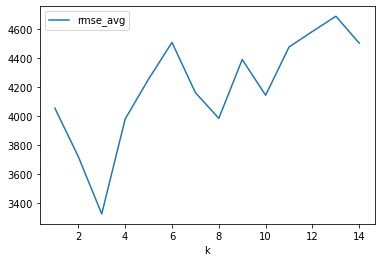

In [8]:
cross_validate()

> We did a __10 fold cross validation__ and found __k = 3__ as the most optimal value. This can be inferred from the above graph.

## 3. Introduce L0 regularization into this setup and retrain the model (5 points) and,


In [25]:
def sub_lists (l):
    lists = [()]
    for i in range(len(l) + 1):
        for j in range(i):
            lists.append(set(l[j: i]))
    return lists
    
column_idx = [i for i in range(0,75)]
#column_names.remove('price')
perms = sub_lists(column_idx)[1:]

for p in perms:
    p.add(75)

In [26]:
def getPrice1(x,ind,k, cols):
    #print("gp"*10)  
    
    
    #print( cols)
    out = []
    for i in range(len(training_data)):
        d = {}
        d['price'] = training_data.iloc[i, len(cols)-1]
        #print(d['price'], cols)
        d['distance'] = np.linalg.norm(np.array(x.iloc[ind, :])-np.array(training_data_u.iloc[i, cols]), ord=2)
        
        
        out.append(d)
    
    out = sorted(out, key=lambda x:x['distance'])[:k]   
    
    mean = sum(d['price'] for d in out)/k
    return mean


def knn1(testing, k, cols):
   mse_sum = 0
   #print(cols)
   for i in range(len(testing)):
       #print(np.abs(getPrice(testing, i, k) - testing.iloc[i, 15]))
       mse_sum +=np.abs(getPrice1(testing, i, k, cols) - testing.iloc[i, len(cols)-1])**2
     
   #print("@"*100)     
   return np.sqrt(mse_sum/len(testing))   

k = 3 #learnt from CV


In [150]:
final_cols = []
def l0_reg():
    for i in range(len(perms)):
        #print(perms[i])
        df1 = df.iloc[:,list(perms[i])]
        #print(df1.head())
        #print(df1.head())
        '''
        b = len(df1.columns)-1
        print(b)
        tmp = df1.iloc[:, b]
        df1.drop(df1.columns[[b]], axis=1, inplace=True)
        df1.iloc[:, b] = tmp

        break 
        '''   
        training_data = df1.sample(frac=0.8, random_state=25)
        testing_data = df1.drop(training_data.index)

        validation_data = training_data.sample(frac=0.25, random_state=25)
        training_data = training_data.drop(validation_data.index)

        #print(training_data.head())
        #print(testing_data.head())
        #print(validation_data.head())


        #print("-"*100)
        alpha = {}
        alpha['columns'] = perms[i]
        alpha['rmse'] = knn1(validation_data, k, list(perms[i]))
        final_cols.append(alpha)
        #print(i+1)
pd.DataFrame(final_cols).to_csv(r"/home/joker/l0.csv")

In [154]:
l0_df = pd.read_csv(r"/home/joker/l0.csv")
l0_df = l0_df[['columns', 'rmse']]
l0_df

,columns,rmse
0,"{0, 75}",7781.278921
1,"{0, 1, 75}",7901.006887
2,"{1, 75}",8571.356109
3,"{0, 1, 2, 75}",5417.710798
4,"{1, 2, 75}",5766.061442
...,...,...
2845,"{70, 71, 72, 73, 74, 75}",8912.511084
2846,"{71, 72, 73, 74, 75}",9041.142199
2847,"{72, 73, 74, 75}",9041.142199
2848,"{73, 74, 75}",9923.364291


In [156]:
sorted(l0_df['rmse'])

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.05205792062953536,
 0.05205792062953536,
 0.05205792062953536,
 0.05205792062953536,
 0.05205792062953536,
 0.05205792062953536,
 0.05205792062953536,
 0.05205792062953536,
 0.05205792062953536,
 0.05205792062953536,
 0.05205792062953536,
 0.05205792062953536,
 0.05205792062953536,
 0.05205792062953536,
 0.05205792062953536,
 0.05205792062953536,
 0.05205792062953536,
 0.05205792062953536,
 0.05205792062953536,
 0.05205792062953536,
 0.05205792062953536,
 0.05205792062953536,
 0.05205792062953536,
 0.05205792062953536,
 0.05205792062953536,
 0.05205792062953536,
 0.05205792062953536,
 0.0520579206295

###  Here I am trying to find the best subset of columns using L0 regularization. I have stored the RMSE and the __Column subsets__ in _l0.csv_ and chose a'reasonable' error and corresponding columns. We will be using these columns to predict the price of test data. This RMSE was also closest to what I got during CV.

In [197]:
cols = l0_df[l0_df['rmse']==3191.472321455397]
tmp = cols.iloc[0, 0].split(', ')
tmp[0] = tmp[0][1:]
l = len(tmp)

tmp[l-1] = tmp[l-1][:len(tmp[l-1])-1]

for i in range(len(tmp)):
    tmp[i] = int(tmp[i])
tmp

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 75]

In [215]:
final_df = df.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 75]]

In [339]:
for col in final_df.columns.values:
    print(col)

symboling
normalized-losses
wheel-base
length
width
height
curb-weight
engine-size
bore
stroke
compression-ratio
horsepower
peak-rpm
city-mpg
highway-mpg
price


## 4. check whether L0 regularization improves generalization and which are the most important features identified by the model for predicting prices. Comment on your findings drawing upon real-world intuitions about car prices. (10 points)

> Based on L0 regularization, following are the fearures I will work use:
    - symboling
    - normalized-losses
    - wheel-base
    - length
    - width
    - height
    - curb-weight
    - engine-size
    - bore
    - stroke
    - compression-ratio
    - horsepower
    - peak-rpm
    - city-mpg
    - highway-mpg

In [235]:
final_df.columns.values
final_df

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.0,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,13495.0
1,1.0,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,16500.0
2,0.6,0.298429,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,0.441667,0.346939,0.166667,0.263158,16500.0
3,0.8,0.518325,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,0.225000,0.551020,0.305556,0.368421,13950.0
4,0.8,0.518325,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,0.279167,0.551020,0.138889,0.157895,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,0.157068,0.655977,0.711940,0.716667,0.641667,0.567882,0.301887,0.885714,0.514286,0.15625,0.275000,0.510204,0.277778,0.315789,16845.0
201,0.2,0.157068,0.655977,0.711940,0.708333,0.641667,0.605508,0.301887,0.885714,0.514286,0.10625,0.466667,0.469388,0.166667,0.236842,19045.0
202,0.2,0.157068,0.655977,0.711940,0.716667,0.641667,0.591156,0.422642,0.742857,0.380952,0.11250,0.358333,0.551020,0.138889,0.184211,21485.0
203,0.2,0.157068,0.655977,0.711940,0.716667,0.641667,0.670675,0.316981,0.335714,0.633333,1.00000,0.241667,0.265306,0.361111,0.289474,22470.0


> NOTE: K=3(Obtained using CV)

In [291]:
def predict(x,k):
    prices = []           
    for j in range(len(x)):
        #print(j)
        out = []

        for i in range(len(final_train)):
            d = {}
            d['price'] = final_train.iloc[i, 15]
            d['distance'] = np.linalg.norm(np.array(x.iloc[j, 0:15])-np.array(final_train.iloc[i,0:15]), ord=2)
            out.append(d)

        out = sorted(out, key=lambda x:x['distance'])[:k]   

        mean = sum(d['price'] for d in out)/k
        prices.append(mean)
        #x.loc[j, 'predicted_price'] = mean
    return prices 

#len(predict(final_test, 3))

In [402]:
final_train = final_df.sample(frac=0.8)
final_test = final_df.drop(final_train.index)
final_test.reset_index(drop=True)
len(final_test)

final_test['pred_price'] =  predict(final_test, 3)
final_test[['price', 'pred_price']]




,price,pred_price
0,13495.000000,11714.000000
1,16500.000000,11714.000000
2,16500.000000,12578.709784
11,16925.000000,12672.666667
13,21105.000000,18126.666667
24,6229.000000,6843.333333
29,12964.000000,13420.666667
33,6529.000000,6933.666667
45,13207.129353,8692.376451
53,6695.000000,6579.666667


In [403]:
final_test['sod'] = (final_test['price'] - final_test['pred_price'])**2


In [406]:
print("RMSE after CV and L0", str(np.sqrt(final_test['sod'].sum()/len(final_test)) ))   

RMSE after CV and L0 2678.3190408963806


In [408]:
(1-np.abs(2678.3190408963806-4340.9913085091675)/4340.9913085091675)*100

61.6983276526347

# So, the results of Cross Validation and L0 Regularization are as under:
1. RMSE after CV and L0 2678.3190408963806
2. RMSE without CV and L0 4340.9913085091675

### Inference: There is a massive reduction(~62%) in the RMSE. Hence I have succesfully fine tuned my model.


## Q2. For this problem, we will be working with the census income dataset from the UCI repository. Using this dataset,
## 1. Train a decision tree classification model using information gain as the splitting criterion and using only single feature decision stumps at all non-leaf nodes and majority votes at leaf nodes, and report its validation set performance using % accuracy (15 points)


In [13]:
column_names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country', 'income']

df = pd.read_csv(r"/home/joker/Downloads/Video/SEM1-Downloads/CS771A/assignments/ass1_graded/adult.data", index_col=False, names = column_names,   header = None)


#defining the columns and reading the file in a dataframe

In [35]:
df.info()

#feature scaling
for col in column_names:
    maxx = df[col].max()
    minn = df[col].min()
    
    
    df[col] = df[col].apply(lambda x: (x-minn)/(maxx-minn))
 
#removing noisy/unnecessary columns
for d in ['fnlwgt', 'capital-gain', 'capital-loss', 'education-num', 'income', 'age']:
    column_names.remove(d)

#df.drop(['fnlwgt', 'capital-gain', 'capital-loss', 'education-num'], axis=1, inplace=True)

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int64
 4   education-num   32561 non-null  int64
 5   marital-status  32561 non-null  int64
 6   occupation      32561 non-null  int64
 7   relationship    32561 non-null  int64
 8   race            32561 non-null  int64
 9   sex             32561 non-null  int64
 10  capital-gain    32561 non-null  int64
 11  capital-loss    32561 non-null  int64
 12  hours-per-week  32561 non-null  int64
 13  native-country  32561 non-null  int64
 14  income          32561 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.0,0.000000,0.000,0.0
1,0.013889,0.142857,0.000046,0.000000,0.000000,0.166667,0.076923,0.2,0.00,0.0,0.008475,0.0,0.010753,0.000,0.0
2,0.027778,0.285714,0.000092,0.066667,0.066667,0.333333,0.153846,0.0,0.00,0.0,0.008475,0.0,0.000000,0.000,0.0
3,0.041667,0.285714,0.000139,0.133333,0.133333,0.166667,0.153846,0.2,0.25,0.0,0.008475,0.0,0.000000,0.000,0.0
4,0.055556,0.285714,0.000185,0.000000,0.000000,0.166667,0.230769,0.4,0.25,1.0,0.008475,0.0,0.000000,0.025,0.0


In [14]:
df.head()

#cleaning
df = df.replace(' ?',np.nan)
df.isna().sum()

df.fillna(df.mode().loc[0], inplace=True)
df.isna().sum()

for col in column_names:
  df[col], tmp  = pd.Series(list(df[col])).factorize()

In [36]:

def ent(col):
    counts = np.unique(col,return_counts=True)
    ent = 0.0
    for ix in counts[1]:
        p = ix/col.shape[0]
        ent += (-1.0*p*np.log2(p))
    return ent

def splitd(x_data,fkey,fval):
    x_right = pd.DataFrame([],columns=x_data.columns)
    x_left = pd.DataFrame([],columns=x_data.columns)
    for i in range(x_data.shape[0]):
        val = x_data[fkey].loc[i]
        if val >=fval:
            x_right = x_right.append(x_data.iloc[i])
        else:
            x_left = x_left.append(x_data.iloc[i])
    return x_right,x_left

def ig(x_data,fkey,fval):
    right,left = splitd(x_data,fkey,fval)
    
    l = float(left.shape[0])/x_data.shape[0]
    r = float(right.shape[0])/x_data.shape[0]
    if left.shape[0] == 0 or right.shape[0] == 0:
        return -99999
    i_gain = ent(x_data.income) - (l * ent(left.income) + r*ent(right.income))
    return i_gain

class DecisionTree:
    def __init__(self,depth=0,max_depth=10):
        self.left = None
        self.right = None
        self.fkey = None
        self.fval = None
        self.depth = depth
        self.max_depth = max_depth
        self.target = None
    
    def train(self,x_train):
        features=column_names
        info_gains = []
        for ix in features:
            i_gain = ig(x_train,ix,x_train[ix].mean())
            info_gains.append(i_gain)
        self.fkey = features[np.argmax(info_gains)]
        self.fval = x_train[self.fkey].mean()
        print("Splitting Tree",self.fkey)
        data_right,data_left = splitd(x_train,self.fkey,self.fval)
        data_right = data_right.reset_index(drop=True)
        data_left = data_left.reset_index(drop=True)
        if data_left.shape[0] == 0 or data_right.shape[0] == 0:
            if x_train.income.mean() >= 0.5:
                self.target = "Positive"
            else:
                self.target = "Negative"
            return
        if self.depth >= self.max_depth:
            if x_train.income.mean() >= 0.5:
                self.target = "Positive"
            else:
                self.target = "Negative"
            return
        self.left = DecisionTree(self.depth+1,self.max_depth)
        self.left.train(data_left)
        self.right = DecisionTree(self.depth+1,self.max_depth)
        self.right.train(data_right)
        if x_train.income.mean() >= 0.5:
            self.target = "Positive"
        else:
            self.target = "Negative"
        return
    def predict(self,test):
        if test[self.fkey] > self.fval:
            if self.right is None:
                return self.target
            return self.right.predict(test)
        if test[self.fkey] <= self.fval:
            if self.left is None:
                return self.target
            return self.left.predict(test)

In [128]:
split = int(0.7*df.shape[0])
train_data = df[:split]
test_data = df[split:]
test_data= test_data.reset_index(drop=True)


test_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.138889,0.285714,0.597635,0.000000,0.000000,0.166667,0.076923,0.2,0.00,0.0,0.008475,0.000000,0.172043,0.0,0.0
1,0.000000,0.285714,0.766573,0.066667,0.066667,0.166667,0.538462,0.2,0.25,0.0,0.008475,0.054945,0.000000,0.0,1.0
2,0.291667,0.285714,0.766619,0.333333,0.333333,0.000000,0.384615,0.6,0.00,1.0,0.008475,0.000000,0.096774,0.0,0.0
3,0.208333,0.285714,0.766665,0.066667,0.066667,0.500000,0.230769,0.0,0.00,0.0,0.008475,0.000000,0.000000,0.0,0.0
4,0.388889,0.142857,0.766711,0.066667,0.066667,0.166667,0.307692,0.2,0.00,0.0,0.008475,0.000000,0.086022,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9764,0.513889,0.285714,1.000000,0.400000,0.400000,0.166667,0.769231,0.4,0.00,1.0,0.008475,0.000000,0.150538,0.0,0.0
9765,0.180556,0.285714,0.029057,0.066667,0.066667,0.166667,0.692308,0.2,0.00,0.0,0.008475,0.000000,0.000000,0.0,1.0
9766,0.694444,0.285714,0.901141,0.066667,0.066667,1.000000,0.000000,0.8,0.00,1.0,0.008475,0.000000,0.000000,0.0,0.0
9767,0.333333,0.285714,0.826350,0.066667,0.066667,0.000000,0.000000,0.6,0.00,0.0,0.008475,0.000000,0.096774,0.0,0.0


In [129]:
dt = DecisionTree()


In [130]:
split = int(0.5*test_data.shape[0])
print(split)
valid_data = test_data[:split]
print(valid_data)
test_data = test_data[split:]
print(test_data)

4884
           age  workclass    fnlwgt  education  education-num  marital-status  \
0     0.138889   0.285714  0.597635   0.000000       0.000000        0.166667   
1     0.000000   0.285714  0.766573   0.066667       0.066667        0.166667   
2     0.291667   0.285714  0.766619   0.333333       0.333333        0.000000   
3     0.208333   0.285714  0.766665   0.066667       0.066667        0.500000   
4     0.388889   0.142857  0.766711   0.066667       0.066667        0.166667   
...        ...        ...       ...        ...            ...             ...   
4879  0.138889   0.571429  0.027302   0.000000       0.000000        0.000000   
4880  0.319444   0.285714  0.292096   0.000000       0.000000        0.000000   
4881  0.333333   0.285714  0.329237   0.466667       0.466667        0.000000   
4882  0.083333   0.285714  0.004435   0.333333       0.333333        0.166667   
4883  0.000000   0.285714  0.768513   0.400000       0.400000        1.000000   

      occupation  rela

In [131]:
test_data  = test_data.reset_index(drop=True)
valid_data  = valid_data.reset_index(drop=True)


In [124]:
valid_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.138889,0.285714,0.597635,0.000000,0.000000,0.166667,0.076923,0.2,0.00,0.0,0.008475,0.000000,0.172043,0.0,0.0
1,0.000000,0.285714,0.766573,0.066667,0.066667,0.166667,0.538462,0.2,0.25,0.0,0.008475,0.054945,0.000000,0.0,1.0
2,0.291667,0.285714,0.766619,0.333333,0.333333,0.000000,0.384615,0.6,0.00,1.0,0.008475,0.000000,0.096774,0.0,0.0
3,0.208333,0.285714,0.766665,0.066667,0.066667,0.500000,0.230769,0.0,0.00,0.0,0.008475,0.000000,0.000000,0.0,0.0
4,0.388889,0.142857,0.766711,0.066667,0.066667,0.166667,0.307692,0.2,0.00,0.0,0.008475,0.000000,0.086022,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4879,0.138889,0.571429,0.027302,0.000000,0.000000,0.000000,0.076923,0.6,0.00,0.0,0.008475,0.000000,0.000000,0.0,0.0
4880,0.319444,0.285714,0.292096,0.000000,0.000000,0.000000,0.461538,0.0,0.00,0.0,0.008475,0.000000,0.000000,0.0,0.0
4881,0.333333,0.285714,0.329237,0.466667,0.466667,0.000000,0.000000,0.6,0.00,1.0,0.008475,0.000000,0.000000,0.0,0.0
4882,0.083333,0.285714,0.004435,0.333333,0.333333,0.166667,0.307692,0.2,0.00,0.0,0.008475,0.000000,0.000000,0.0,0.0


In [125]:
test_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.000000,0.285714,0.888530,0.066667,0.066667,0.166667,0.230769,0.2,0.25,0.0,0.008475,0.0,0.000000,0.0,0.0
1,0.194444,0.285714,0.888576,0.333333,0.333333,0.000000,0.000000,1.0,0.00,1.0,0.008475,0.0,0.000000,0.0,0.0
2,0.097222,0.571429,0.664711,0.333333,0.333333,0.166667,0.076923,0.2,0.00,0.0,0.008475,0.0,0.000000,0.0,1.0
3,0.375000,0.285714,0.888622,0.466667,0.466667,0.000000,0.000000,0.0,0.00,1.0,0.008475,0.0,0.000000,0.0,0.0
4,0.027778,0.285714,0.888668,0.000000,0.000000,0.166667,0.230769,0.2,0.00,0.0,0.008475,0.0,0.032258,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4880,0.513889,0.285714,1.000000,0.400000,0.400000,0.166667,0.769231,0.4,0.00,1.0,0.008475,0.0,0.150538,0.0,0.0
4881,0.180556,0.285714,0.029057,0.066667,0.066667,0.166667,0.692308,0.2,0.00,0.0,0.008475,0.0,0.000000,0.0,1.0
4882,0.694444,0.285714,0.901141,0.066667,0.066667,1.000000,0.000000,0.8,0.00,1.0,0.008475,0.0,0.000000,0.0,0.0
4883,0.333333,0.285714,0.826350,0.066667,0.066667,0.000000,0.000000,0.6,0.00,0.0,0.008475,0.0,0.096774,0.0,0.0


In [132]:
dt.train(train_data[:5000])

Splitting Tree relationship
Splitting Tree relationship
Splitting Tree occupation
Splitting Tree workclass
Splitting Tree hours-per-week
Splitting Tree marital-status
Splitting Tree education
Splitting Tree education
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree occupation
Splitting Tree occupation
Splitting Tree occupation
Splitting Tree sex
Splitting Tree occupation
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree occupation
Splitting Tree occupation
Splitting Tree education
Splitting Tree occupation
Splitting Tree occupation
Splitting Tree race
Splitting Tree native-country
Splitting Tree workclass
Splitting Tree education
Splitting Tree hours-per-week
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree education
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree education
Splitting Tree workclass
Splitting Tree education
Splitting Tree education
Splitting Tree education
Splitting Tree education
Splitting Tree hours-per-w

Splitting Tree education
Splitting Tree occupation
Splitting Tree education
Splitting Tree education
Splitting Tree education
Splitting Tree education
Splitting Tree workclass
Splitting Tree education
Splitting Tree education
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree education
Splitting Tree occupation
Splitting Tree occupation
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree hours-per-week
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree education
Splitting Tree occupation
Splitting Tree education
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree education
Splitting Tree education
Splitting Tree education
Splitting Tree education
Splitting Tree education
Splitting Tree education
Splitting Tree education
Splitting Tree workclass
Splitting Tree hours-per-week
Splitting Tree workclass
Splitting T

Splitting Tree education
Splitting Tree workclass
Splitting Tree education
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree education
Splitting Tree education
Splitting Tree education
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree education
Splitting Tree education
Splitting Tree education
Splitting Tree education
Splitting Tree race
Splitting Tree hours-per-week
Splitting Tree education
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree race
Splitting Tree native-country
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree hours-per-week
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree hours-per-week
Splitting Tree education
Splitting Tree race
Splitting Tree workclass
Splitting Tree education
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree education
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree occupation
Splitting Tree occu

Splitting Tree marital-status
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree education
Splitting Tree education
Splitting Tree marital-status
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree education
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree education
Splitting Tree education
Splitting Tree workclass
Splitting Tree marital-status
Splitting Tree education
Splitting Tree education
Splitting Tree workclass
Splitting Tree hours-per-week
Splitting Tree education
Splitting Tree workclass
Splitting Tree education
Splitting Tree workclass
Splitting Tree education
Splitting Tree occupation
Splitting Tree education
Splitting Tree workclass
Splitting Tree occupation
Splitting Tree education
Splitting Tree education
Splitting Tree workclass
Splitting Tree relationship
Splitting Tree workclass
Splitting Tree education
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree workclass


Splitting Tree education
Splitting Tree education
Splitting Tree native-country
Splitting Tree occupation
Splitting Tree workclass
Splitting Tree education
Splitting Tree education
Splitting Tree education
Splitting Tree workclass
Splitting Tree native-country
Splitting Tree education
Splitting Tree education
Splitting Tree marital-status
Splitting Tree education
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree marital-status
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree education
Splitting Tree education
Splitting Tree education
Splitting Tree race
Splitting Tree education
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree education
Splitting Tree workclass
Splitting Tree race
Splitting Tree workclass
Splitting Tree hours-per-week
Splitting Tree relationship
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree education
Splitting Tree marital-status
S

In [136]:
train_data = train_data[:5000]
dt

In [137]:
y_pred = []
for ix in range(valid_data.shape[0]):
    y_pred.append(dt.predict(valid_data.loc[ix]))

y_pred[:10]

for i in range(len(y_pred)):
    if y_pred[i] == "Negative":
        y_pred[i] = 0
    else:
        y_pred[i] = 1

print("Depth:10; Accuracy is", str(round(np.mean(y_pred == valid_data['income'])*100,2)), '%')

Depth:10; Accuracy is 80.0 %


## 2. Use cross-validation to optimize the tree hyperparameters (10 points)
### > __3-fold CV__ : I have already used a maxDepth of 10 with the 9 features above, and obtained an accuracy of 80% on validation data, now I shall be using maxDepths of 8, 9 and see how it works:


In [138]:
mds = [8,9]
for md in mds:
    dt = DecisionTree(max_depth=md)
    dt.train(train_data)
    y_pred = []
    for ix in range(valid_data.shape[0]):
        y_pred.append(dt.predict(valid_data.loc[ix]))

    y_pred[:10]

    for i in range(len(y_pred)):
        if y_pred[i] == "Negative":
            y_pred[i] = 0
        else:
            y_pred[i] = 1

    print("Depth:",str(md), ";", "Accuracy is", str(round(np.mean(y_pred == valid_data['income'])*100,2)), '%')
    
    
    

Splitting Tree relationship
Splitting Tree relationship
Splitting Tree occupation
Splitting Tree workclass
Splitting Tree hours-per-week
Splitting Tree marital-status
Splitting Tree education
Splitting Tree education
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree race
Splitting Tree native-country
Splitting Tree workclass
Splitting Tree education
Splitting Tree hours-per-week
Splitting Tree workclass
Splitting Tree hours-per-week
Splitting Tree race
Splitting Tree sex
Splitting Tree workclass
Splitting Tree marital-status
Splitting Tree education
Splitting Tree workclass
Splitting Tree education
Splitting Tree race
Splitting Tree education
Splitting Tree workclass
Splitting Tree education
Splitting Tree sex
Splitting Tree education
Splitting Tree marital-status
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree education
Splitting Tree education
Splitting Tree education
Splitting Tree marital-status
Splitting Tree occupation
Spli

Splitting Tree education
Splitting Tree workclass
Splitting Tree relationship
Splitting Tree workclass
Splitting Tree education
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree education
Splitting Tree workclass
Splitting Tree relationship
Splitting Tree education
Splitting Tree workclass
Splitting Tree native-country
Splitting Tree marital-status
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree education
Splitting Tree education
Splitting Tree education
Splitting Tree education
Splitting Tree education
Splitting Tree education
Splitting Tree education
Splitting Tree education
Splitting Tree education
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree education
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree relationship
Splitting Tree relationship
Splitting Tree occupation
Sp

Splitting Tree workclass
Splitting Tree workclass
Splitting Tree education
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree education
Splitting Tree education
Splitting Tree education
Splitting Tree education
Splitting Tree education
Splitting Tree marital-status
Splitting Tree education
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree hours-per-week
Splitting Tree marital-status
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree education
Splitting Tree education
Splitting Tree education
Splitting Tree workclass
Splitting Tree education
Splitting Tree education
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree education
Splitting Tree occupation
Splitting Tree occupation
Splitting Tree workclass
Splitting Tree hours-per-week
Splitting Tree workclass
Splitting Tree education
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree education
Spl

Splitting Tree occupation
Splitting Tree education
Splitting Tree occupation
Splitting Tree education
Splitting Tree occupation
Splitting Tree occupation
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree native-country
Splitting Tree workclass
Splitting Tree education
Splitting Tree workclass
Splitting Tree occupation
Splitting Tree workclass
Splitting Tree occupation
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree education
Splitting Tree education
Splitting Tree education
Splitting Tree occupation
Splitting Tree education
Splitting Tree education
Splitting Tree education
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree education
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree education
Splitting Tree education
Splitting Tree education
Splitting Tree occupation
Splitting Tree occupation
Splitting T

Splitting Tree occupation
Splitting Tree workclass
Splitting Tree marital-status
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree native-country
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree marital-status
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree education
Splitting Tree education
Splitting Tree marital-status
Splitting Tree education
Splitting Tree education
Splitting Tree education
Splitting Tree education
Splitting Tree workclass
Splitting Tree occupation
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree education
Splitting Tree education
Splitting Tree education
Splitting Tree workclass
Splitting Tree race
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree workclass
Splitting Tree education
Splitting Tree education
Splitting Tree education
Splitting Tree education
Splitting Tree workclass
Splitting Tree workclass
Splittin

### - Depth: 8 ; Accuracy is 81.02 %
### - Depth: 9 ; Accuracy is 79.98 %
### - Depth:10; Accuracy is 80.0 %

 # Hence, we come to a conclusion that maxDepth of 8 is the most optimal

In [ ]:
dt = DecisionTree(max_depth=8)
dt.train(train_data)


In [146]:
y_pred = []
for ix in range(test_data.shape[0]):
    y_pred.append(dt.predict(test_data.loc[ix]))

y_pred[:10]



['Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative']

In [147]:
for i in range(len(y_pred)):
    if y_pred[i] == "Negative":
        y_pred[i] = 0
    else:
        y_pred[i] = 1

print("Depth:",str(8), ";", "Accuracy is", str(round(np.mean(y_pred == test_data['income'])*100,2)), '%')

Depth: 8 ; Accuracy is 80.51 %


## So I am getting an accuracy of 80.51% on test data with a value of maxDepth as 8, as obtained after cross validation

3. Improve on the best test set performance this classifier has to offer with a better version that uses more complex splitting criteria than single-feature decision stumps (10 points)